In [6]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
import pickle
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [7]:
folder_neg="D:\College\SEM 5\CV\custard apple\custard apple" #negative
folder_pos="D:\College\SEM 5\CV\Training\Mealybug" #positive

In [8]:
csv1_b=r"D:\College\SEM 5\CV\Negative.csv"
csv2_b=r"D:\College\SEM 5\CV\Positive.csv"

In [4]:
def feature_brisk(folder_name, csv_dest):
    i=0
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)

        #resize image
        resize=(100,100)
        img=cv2.resize(a,resize)

        #gray image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
        # creating a Histograms Equalization of a image using cv2.equalizeHist()
        equ = cv2.equalizeHist(img2)
        
        kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
        kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
        img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
        img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
        img_prewitt = img_prewittx + img_prewitty

        #brisk code for feature descriptor
        brisk = cv2.BRISK_create()
        keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
        
        out=pd.DataFrame(descriptor)
        #convert the descriptor array into a dataframe format
        print("descriptor shape ",i," : ", out.shape)
        i=i+1
        if i==2000:
            break

        #drop first coloumn as it's the no of feature detected. Not required.
        #append to the csv file
        csv_data=out.to_csv(csv_dest, mode='a', header=False,index=False)

In [5]:
feature_brisk(folder_neg,csv1_b)

descriptor shape  0  :  (85, 64)
descriptor shape  1  :  (251, 64)
descriptor shape  2  :  (194, 64)
descriptor shape  3  :  (293, 64)
descriptor shape  4  :  (189, 64)
descriptor shape  5  :  (187, 64)
descriptor shape  6  :  (292, 64)
descriptor shape  7  :  (278, 64)
descriptor shape  8  :  (243, 64)
descriptor shape  9  :  (209, 64)
descriptor shape  10  :  (150, 64)
descriptor shape  11  :  (173, 64)
descriptor shape  12  :  (84, 64)
descriptor shape  13  :  (146, 64)
descriptor shape  14  :  (201, 64)
descriptor shape  15  :  (192, 64)
descriptor shape  16  :  (150, 64)
descriptor shape  17  :  (181, 64)
descriptor shape  18  :  (224, 64)
descriptor shape  19  :  (131, 64)
descriptor shape  20  :  (195, 64)
descriptor shape  21  :  (162, 64)
descriptor shape  22  :  (235, 64)
descriptor shape  23  :  (157, 64)
descriptor shape  24  :  (117, 64)
descriptor shape  25  :  (242, 64)
descriptor shape  26  :  (155, 64)
descriptor shape  27  :  (267, 64)
descriptor shape  28  :  (86, 64

descriptor shape  234  :  (140, 64)
descriptor shape  235  :  (92, 64)
descriptor shape  236  :  (174, 64)
descriptor shape  237  :  (285, 64)
descriptor shape  238  :  (215, 64)
descriptor shape  239  :  (152, 64)
descriptor shape  240  :  (155, 64)
descriptor shape  241  :  (144, 64)
descriptor shape  242  :  (178, 64)
descriptor shape  243  :  (209, 64)
descriptor shape  244  :  (219, 64)
descriptor shape  245  :  (200, 64)
descriptor shape  246  :  (141, 64)
descriptor shape  247  :  (228, 64)
descriptor shape  248  :  (220, 64)
descriptor shape  249  :  (229, 64)
descriptor shape  250  :  (244, 64)
descriptor shape  251  :  (125, 64)
descriptor shape  252  :  (255, 64)
descriptor shape  253  :  (274, 64)
descriptor shape  254  :  (189, 64)
descriptor shape  255  :  (216, 64)
descriptor shape  256  :  (186, 64)
descriptor shape  257  :  (193, 64)
descriptor shape  258  :  (307, 64)
descriptor shape  259  :  (286, 64)
descriptor shape  260  :  (196, 64)
descriptor shape  261  :  (12

descriptor shape  463  :  (232, 64)
descriptor shape  464  :  (202, 64)
descriptor shape  465  :  (272, 64)
descriptor shape  466  :  (343, 64)
descriptor shape  467  :  (259, 64)
descriptor shape  468  :  (141, 64)
descriptor shape  469  :  (230, 64)
descriptor shape  470  :  (171, 64)
descriptor shape  471  :  (255, 64)
descriptor shape  472  :  (224, 64)
descriptor shape  473  :  (178, 64)
descriptor shape  474  :  (181, 64)
descriptor shape  475  :  (179, 64)
descriptor shape  476  :  (140, 64)
descriptor shape  477  :  (209, 64)
descriptor shape  478  :  (193, 64)
descriptor shape  479  :  (217, 64)
descriptor shape  480  :  (91, 64)
descriptor shape  481  :  (216, 64)
descriptor shape  482  :  (187, 64)
descriptor shape  483  :  (236, 64)
descriptor shape  484  :  (235, 64)
descriptor shape  485  :  (129, 64)
descriptor shape  486  :  (279, 64)
descriptor shape  487  :  (181, 64)
descriptor shape  488  :  (121, 64)
descriptor shape  489  :  (208, 64)
descriptor shape  490  :  (17

descriptor shape  693  :  (264, 64)
descriptor shape  694  :  (112, 64)
descriptor shape  695  :  (149, 64)
descriptor shape  696  :  (136, 64)
descriptor shape  697  :  (239, 64)
descriptor shape  698  :  (171, 64)
descriptor shape  699  :  (208, 64)
descriptor shape  700  :  (175, 64)
descriptor shape  701  :  (194, 64)
descriptor shape  702  :  (125, 64)
descriptor shape  703  :  (272, 64)
descriptor shape  704  :  (149, 64)
descriptor shape  705  :  (174, 64)
descriptor shape  706  :  (145, 64)
descriptor shape  707  :  (189, 64)
descriptor shape  708  :  (222, 64)
descriptor shape  709  :  (194, 64)
descriptor shape  710  :  (173, 64)
descriptor shape  711  :  (153, 64)
descriptor shape  712  :  (208, 64)
descriptor shape  713  :  (177, 64)
descriptor shape  714  :  (202, 64)
descriptor shape  715  :  (240, 64)
descriptor shape  716  :  (212, 64)
descriptor shape  717  :  (285, 64)
descriptor shape  718  :  (85, 64)
descriptor shape  719  :  (222, 64)
descriptor shape  720  :  (21

In [6]:
feature_brisk(folder_pos,csv2_b)

descriptor shape  0  :  (235, 64)
descriptor shape  1  :  (181, 64)
descriptor shape  2  :  (92, 64)
descriptor shape  3  :  (230, 64)
descriptor shape  4  :  (199, 64)
descriptor shape  5  :  (188, 64)
descriptor shape  6  :  (216, 64)
descriptor shape  7  :  (143, 64)
descriptor shape  8  :  (135, 64)
descriptor shape  9  :  (196, 64)
descriptor shape  10  :  (93, 64)
descriptor shape  11  :  (185, 64)
descriptor shape  12  :  (240, 64)
descriptor shape  13  :  (205, 64)
descriptor shape  14  :  (192, 64)
descriptor shape  15  :  (203, 64)
descriptor shape  16  :  (219, 64)
descriptor shape  17  :  (251, 64)
descriptor shape  18  :  (221, 64)
descriptor shape  19  :  (207, 64)
descriptor shape  20  :  (180, 64)
descriptor shape  21  :  (137, 64)
descriptor shape  22  :  (224, 64)
descriptor shape  23  :  (169, 64)
descriptor shape  24  :  (189, 64)
descriptor shape  25  :  (179, 64)
descriptor shape  26  :  (156, 64)
descriptor shape  27  :  (184, 64)
descriptor shape  28  :  (159, 6

descriptor shape  231  :  (182, 64)
descriptor shape  232  :  (130, 64)
descriptor shape  233  :  (143, 64)
descriptor shape  234  :  (154, 64)
descriptor shape  235  :  (100, 64)
descriptor shape  236  :  (109, 64)
descriptor shape  237  :  (103, 64)
descriptor shape  238  :  (174, 64)
descriptor shape  239  :  (125, 64)
descriptor shape  240  :  (46, 64)
descriptor shape  241  :  (92, 64)
descriptor shape  242  :  (90, 64)
descriptor shape  243  :  (153, 64)
descriptor shape  244  :  (107, 64)
descriptor shape  245  :  (141, 64)
descriptor shape  246  :  (172, 64)
descriptor shape  247  :  (46, 64)
descriptor shape  248  :  (53, 64)
descriptor shape  249  :  (79, 64)
descriptor shape  250  :  (106, 64)
descriptor shape  251  :  (54, 64)
descriptor shape  252  :  (55, 64)
descriptor shape  253  :  (29, 64)
descriptor shape  254  :  (27, 64)
descriptor shape  255  :  (76, 64)
descriptor shape  256  :  (57, 64)
descriptor shape  257  :  (75, 64)
descriptor shape  258  :  (64, 64)
descri

In [5]:
#NEGATIVE IMAGES FEATURES
data1_b = pd.read_csv(csv1_b,header=None,dtype='float64')


data1_b=data1_b.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data1_b

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,180.0,27.0,215.0,239.0,103.0,0.0,0.0,0.0,0.0,198.0,...,0.0,0.0,36.0,219.0,65.0,0.0,0.0,0.0,0.0,0.0
1,244.0,59.0,231.0,237.0,102.0,0.0,0.0,0.0,0.0,0.0,...,1.0,129.0,38.0,255.0,97.0,0.0,0.0,0.0,0.0,0.0
2,176.0,123.0,199.0,225.0,111.0,0.0,0.0,0.0,0.0,0.0,...,128.0,72.0,46.0,219.0,97.0,0.0,0.0,0.0,0.0,0.0
3,176.0,123.0,223.0,231.0,235.0,1.0,0.0,0.0,0.0,0.0,...,5.0,132.0,38.0,215.0,239.0,33.0,0.0,0.0,0.0,0.0
4,252.0,191.0,231.0,240.0,252.0,76.0,0.0,0.0,0.0,0.0,...,0.0,72.0,6.0,131.0,217.0,255.0,26.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345738,95.0,204.0,105.0,26.0,48.0,113.0,254.0,128.0,185.0,251.0,...,63.0,175.0,249.0,252.0,255.0,1.0,192.0,240.0,225.0,239.0
345739,190.0,0.0,16.0,0.0,10.0,90.0,126.0,185.0,255.0,247.0,...,190.0,108.0,186.0,3.0,38.0,247.0,134.0,123.0,59.0,48.0
345740,75.0,196.0,56.0,30.0,159.0,63.0,134.0,200.0,24.0,249.0,...,251.0,255.0,249.0,190.0,5.0,238.0,56.0,0.0,17.0,146.0
345741,79.0,238.0,108.0,27.0,176.0,117.0,251.0,144.0,141.0,219.0,...,191.0,167.0,249.0,252.0,127.0,0.0,193.0,208.0,239.0,207.0


In [6]:
#POSITIVE IMAGE FEATURES
data2_b = pd.read_csv(csv2_b,header=None,dtype='float64')


data2_b=data2_b.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data2_b

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,223.0,3.0,0.0,12.0,190.0,254.0,125.0,0.0,128.0,161.0,...,255.0,247.0,9.0,0.0,139.0,251.0,16.0,12.0,137.0,10.0
1,252.0,191.0,231.0,241.0,248.0,72.0,0.0,0.0,129.0,194.0,...,255.0,247.0,33.0,0.0,251.0,113.0,26.0,175.0,140.0,143.0
2,107.0,135.0,32.0,16.0,16.0,184.0,252.0,176.0,178.0,161.0,...,248.0,46.0,154.0,254.0,119.0,54.0,0.0,0.0,0.0,128.0
3,180.0,0.0,208.0,111.0,103.0,87.0,12.0,0.0,128.0,226.0,...,75.0,0.0,0.0,130.0,137.0,255.0,51.0,192.0,255.0,91.0
4,6.0,192.0,29.0,6.0,3.0,3.0,70.0,252.0,255.0,251.0,...,126.0,15.0,0.0,0.0,231.0,119.0,159.0,175.0,15.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114039,244.0,187.0,223.0,97.0,96.0,0.0,0.0,67.0,65.0,198.0,...,216.0,254.0,215.0,65.0,96.0,245.0,127.0,0.0,16.0,0.0
114040,20.0,0.0,216.0,15.0,32.0,23.0,46.0,24.0,216.0,250.0,...,64.0,88.0,150.0,1.0,114.0,251.0,62.0,63.0,29.0,0.0
114041,148.0,11.0,209.0,175.0,6.0,64.0,76.0,33.0,245.0,254.0,...,93.0,241.0,5.0,76.0,231.0,254.0,189.0,140.0,223.0,255.0
114042,176.0,123.0,194.0,235.0,229.0,5.0,0.0,71.0,66.0,70.0,...,32.0,32.0,20.0,0.0,226.0,255.0,62.0,77.0,16.0,16.0


In [7]:
data_b=data1_b.append(data2_b)
data_b

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,180.0,27.0,215.0,239.0,103.0,0.0,0.0,0.0,0.0,198.0,...,0.0,0.0,36.0,219.0,65.0,0.0,0.0,0.0,0.0,0.0
1,244.0,59.0,231.0,237.0,102.0,0.0,0.0,0.0,0.0,0.0,...,1.0,129.0,38.0,255.0,97.0,0.0,0.0,0.0,0.0,0.0
2,176.0,123.0,199.0,225.0,111.0,0.0,0.0,0.0,0.0,0.0,...,128.0,72.0,46.0,219.0,97.0,0.0,0.0,0.0,0.0,0.0
3,176.0,123.0,223.0,231.0,235.0,1.0,0.0,0.0,0.0,0.0,...,5.0,132.0,38.0,215.0,239.0,33.0,0.0,0.0,0.0,0.0
4,252.0,191.0,231.0,240.0,252.0,76.0,0.0,0.0,0.0,0.0,...,0.0,72.0,6.0,131.0,217.0,255.0,26.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114039,244.0,187.0,223.0,97.0,96.0,0.0,0.0,67.0,65.0,198.0,...,216.0,254.0,215.0,65.0,96.0,245.0,127.0,0.0,16.0,0.0
114040,20.0,0.0,216.0,15.0,32.0,23.0,46.0,24.0,216.0,250.0,...,64.0,88.0,150.0,1.0,114.0,251.0,62.0,63.0,29.0,0.0
114041,148.0,11.0,209.0,175.0,6.0,64.0,76.0,33.0,245.0,254.0,...,93.0,241.0,5.0,76.0,231.0,254.0,189.0,140.0,223.0,255.0
114042,176.0,123.0,194.0,235.0,229.0,5.0,0.0,71.0,66.0,70.0,...,32.0,32.0,20.0,0.0,226.0,255.0,62.0,77.0,16.0,16.0


# Elbow Method For Brisk

In [8]:
csv_data=data_b.to_csv("D:\College\SEM 5\CV\BRISK_FINAL.csv", mode='a', header=False,index=False)

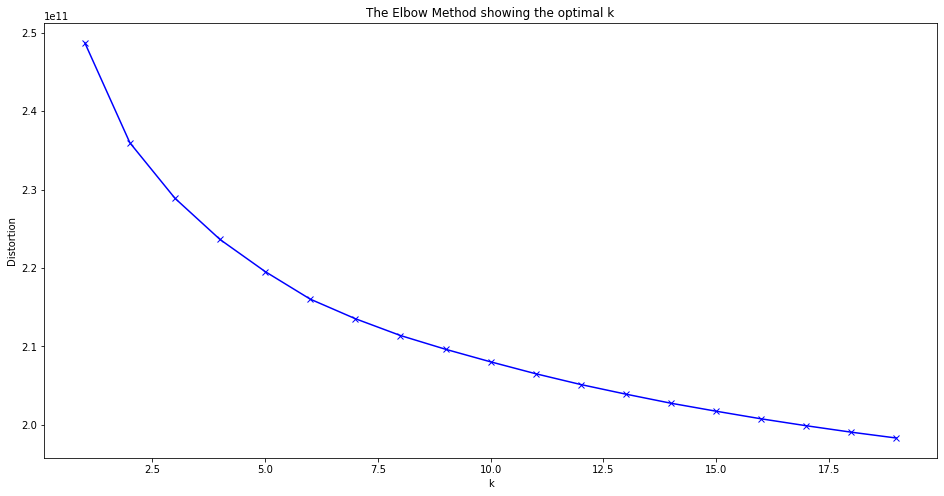

In [9]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_b)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=16)
kmeans.fit(data_b)

KMeans(n_clusters=16)

In [11]:
filename = 'Kmeans_BRISK_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [12]:
hist=np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([26024, 32029, 28444, 27089, 29397, 30884, 31896, 27369, 30718,
       27009, 31176, 26017, 26265, 28988, 28824, 27658], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])) 



In [15]:
#performing kmeans prediction of the entire  dataset with the pretrained kmeans model


#initialising i=0; as its the 1st class

i=0
data=[]
c=0

for filename in os.listdir(folder_neg):
    #path
    path=os.path.join(folder_neg,filename)
    a=cv2.imread(path)

    #resize image
    resize=(100, 100)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
     # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
        
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    print("keypoint length ",c," : ", len(keypoint))
    c=c+1
    if c==2000:
        break
    
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv(r"D:\College\SEM 5\CV\Negative_Prediction_B.csv", mode='a',header=False,index=False)

keypoint length  0  :  85
keypoint length  1  :  251
keypoint length  2  :  194
keypoint length  3  :  293
keypoint length  4  :  189
keypoint length  5  :  187
keypoint length  6  :  292
keypoint length  7  :  278
keypoint length  8  :  243
keypoint length  9  :  209
keypoint length  10  :  150
keypoint length  11  :  173
keypoint length  12  :  84
keypoint length  13  :  146
keypoint length  14  :  201
keypoint length  15  :  192
keypoint length  16  :  150
keypoint length  17  :  181
keypoint length  18  :  224
keypoint length  19  :  131
keypoint length  20  :  195
keypoint length  21  :  162
keypoint length  22  :  235
keypoint length  23  :  157
keypoint length  24  :  117
keypoint length  25  :  242
keypoint length  26  :  155
keypoint length  27  :  267
keypoint length  28  :  86
keypoint length  29  :  234
keypoint length  30  :  97
keypoint length  31  :  190
keypoint length  32  :  232
keypoint length  33  :  121
keypoint length  34  :  171
keypoint length  35  :  187
keypoi

keypoint length  289  :  180
keypoint length  290  :  231
keypoint length  291  :  146
keypoint length  292  :  156
keypoint length  293  :  142
keypoint length  294  :  252
keypoint length  295  :  182
keypoint length  296  :  108
keypoint length  297  :  179
keypoint length  298  :  264
keypoint length  299  :  158
keypoint length  300  :  252
keypoint length  301  :  273
keypoint length  302  :  287
keypoint length  303  :  250
keypoint length  304  :  280
keypoint length  305  :  219
keypoint length  306  :  287
keypoint length  307  :  228
keypoint length  308  :  255
keypoint length  309  :  202
keypoint length  310  :  157
keypoint length  311  :  181
keypoint length  312  :  218
keypoint length  313  :  95
keypoint length  314  :  212
keypoint length  315  :  120
keypoint length  316  :  231
keypoint length  317  :  224
keypoint length  318  :  122
keypoint length  319  :  203
keypoint length  320  :  180
keypoint length  321  :  216
keypoint length  322  :  249
keypoint length

keypoint length  573  :  202
keypoint length  574  :  191
keypoint length  575  :  144
keypoint length  576  :  183
keypoint length  577  :  120
keypoint length  578  :  200
keypoint length  579  :  198
keypoint length  580  :  228
keypoint length  581  :  219
keypoint length  582  :  271
keypoint length  583  :  179
keypoint length  584  :  235
keypoint length  585  :  255
keypoint length  586  :  197
keypoint length  587  :  87
keypoint length  588  :  192
keypoint length  589  :  205
keypoint length  590  :  156
keypoint length  591  :  106
keypoint length  592  :  107
keypoint length  593  :  167
keypoint length  594  :  177
keypoint length  595  :  171
keypoint length  596  :  99
keypoint length  597  :  112
keypoint length  598  :  86
keypoint length  599  :  120
keypoint length  600  :  68
keypoint length  601  :  245
keypoint length  602  :  238
keypoint length  603  :  239
keypoint length  604  :  174
keypoint length  605  :  93
keypoint length  606  :  188
keypoint length  60

In [16]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=1
data=[]
k=0
for filename in os.listdir(folder_pos):
    path=os.path.join(folder_pos,filename)
    a=cv2.imread(path)
    resize=(100, 100)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
     # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
        
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    print("keypoint length ",k," : ", len(keypoint))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv(r"D:\College\SEM 5\CV\pos_prediction_B.csv", mode='a',header=False,index=False)

keypoint length  0  :  235
keypoint length  1  :  181
keypoint length  2  :  92
keypoint length  3  :  230
keypoint length  4  :  199
keypoint length  5  :  188
keypoint length  6  :  216
keypoint length  7  :  143
keypoint length  8  :  135
keypoint length  9  :  196
keypoint length  10  :  93
keypoint length  11  :  185
keypoint length  12  :  240
keypoint length  13  :  205
keypoint length  14  :  192
keypoint length  15  :  203
keypoint length  16  :  219
keypoint length  17  :  251
keypoint length  18  :  221
keypoint length  19  :  207
keypoint length  20  :  180
keypoint length  21  :  137
keypoint length  22  :  224
keypoint length  23  :  169
keypoint length  24  :  189
keypoint length  25  :  179
keypoint length  26  :  156
keypoint length  27  :  184
keypoint length  28  :  159
keypoint length  29  :  156
keypoint length  30  :  145
keypoint length  31  :  195
keypoint length  32  :  145
keypoint length  33  :  151
keypoint length  34  :  113
keypoint length  35  :  220
keyp

keypoint length  288  :  112
keypoint length  289  :  91
keypoint length  290  :  101
keypoint length  291  :  107
keypoint length  292  :  121
keypoint length  293  :  84
keypoint length  294  :  75
keypoint length  295  :  89
keypoint length  296  :  91
keypoint length  297  :  117
keypoint length  298  :  105
keypoint length  299  :  111
keypoint length  300  :  108
keypoint length  301  :  49
keypoint length  302  :  96
keypoint length  303  :  158
keypoint length  304  :  144
keypoint length  305  :  125
keypoint length  306  :  179
keypoint length  307  :  169
keypoint length  308  :  147
keypoint length  309  :  103
keypoint length  310  :  103
keypoint length  311  :  123
keypoint length  312  :  140
keypoint length  313  :  149
keypoint length  314  :  196
keypoint length  315  :  154
keypoint length  316  :  106
keypoint length  317  :  84
keypoint length  318  :  105
keypoint length  319  :  103
keypoint length  320  :  94
keypoint length  321  :  98
keypoint length  322  : 

In [17]:
print("Negative Images")
dat1_B = pd.read_csv(r"D:\College\SEM 5\CV\Negative_Prediction_B.csv",header=None)
print(dat1_B)

Negative Images
           0         1         2         3         4         5         6   \
0    0.058824  0.023529  0.023529  0.294118  0.082353  0.035294  0.023529   
1    0.039841  0.043825  0.063745  0.035857  0.087649  0.063745  0.063745   
2    0.061856  0.020619  0.118557  0.030928  0.025773  0.030928  0.134021   
3    0.054608  0.058020  0.071672  0.020478  0.058020  0.088737  0.075085   
4    0.037037  0.047619  0.089947  0.015873  0.079365  0.058201  0.063492   
..        ...       ...       ...       ...       ...       ...       ...   
819  0.071111  0.066667  0.075556  0.044444  0.062222  0.088889  0.062222   
820  0.062827  0.062827  0.136126  0.020942  0.062827  0.078534  0.047120   
821  0.061776  0.115830  0.042471  0.000000  0.042471  0.050193  0.092664   
822  0.057143  0.066667  0.023810  0.052381  0.100000  0.047619  0.052381   
823  0.045000  0.065000  0.090000  0.040000  0.075000  0.040000  0.075000   

           7         8         9         10        11      

In [19]:
print("Pos Images")
dat2 = pd.read_csv(r"D:\College\SEM 5\CV\pos_prediction_B.csv",header=None)
print(dat2)

Pos Images
           0         1         2         3         4         5         6   \
0    0.059574  0.093617  0.038298  0.034043  0.051064  0.076596  0.097872   
1    0.044199  0.055249  0.044199  0.049724  0.044199  0.082873  0.110497   
2    0.097826  0.032609  0.097826  0.195652  0.097826  0.032609  0.010870   
3    0.056522  0.095652  0.069565  0.026087  0.052174  0.086957  0.069565   
4    0.045226  0.055276  0.050251  0.050251  0.060302  0.075377  0.040201   
..        ...       ...       ...       ...       ...       ...       ...   
392  0.075630  0.096639  0.037815  0.029412  0.054622  0.046218  0.117647   
393  0.044000  0.108000  0.060000  0.028000  0.048000  0.096000  0.096000   
394  0.084507  0.042254  0.028169  0.239437  0.056338  0.070423  0.000000   
395  0.044199  0.055249  0.044199  0.049724  0.044199  0.082873  0.110497   
396  0.045226  0.055276  0.050251  0.050251  0.060302  0.075377  0.040201   

           7         8         9         10        11        12 

In [20]:
A=dat1_B.append(dat2)
csv_data=A.to_csv("D:\College\SEM 5\CV\FinalBRISK.csv", mode='a',header=False,index=False)

In [21]:
brisk = pd.read_csv("D:\College\SEM 5\CV\FinalBRISK.csv",header=None)
brisk

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.058824,0.023529,0.023529,0.294118,0.082353,0.035294,0.023529,0.058824,0.011765,0.047059,0.047059,0.035294,0.082353,0.058824,0.082353,0.035294,0
1,0.039841,0.043825,0.063745,0.035857,0.087649,0.063745,0.063745,0.067729,0.087649,0.059761,0.107570,0.091633,0.039841,0.063745,0.071713,0.011952,0
2,0.061856,0.020619,0.118557,0.030928,0.025773,0.030928,0.134021,0.041237,0.072165,0.113402,0.025773,0.046392,0.036082,0.087629,0.051546,0.103093,0
3,0.054608,0.058020,0.071672,0.020478,0.058020,0.088737,0.075085,0.068259,0.078498,0.044369,0.085324,0.078498,0.051195,0.071672,0.064846,0.030717,0
4,0.037037,0.047619,0.089947,0.015873,0.079365,0.058201,0.063492,0.052910,0.058201,0.068783,0.095238,0.084656,0.042328,0.105820,0.031746,0.068783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,0.075630,0.096639,0.037815,0.029412,0.054622,0.046218,0.117647,0.042017,0.088235,0.029412,0.067227,0.067227,0.050420,0.079832,0.079832,0.037815,1
1217,0.044000,0.108000,0.060000,0.028000,0.048000,0.096000,0.096000,0.056000,0.068000,0.056000,0.060000,0.048000,0.044000,0.064000,0.068000,0.056000,1
1218,0.084507,0.042254,0.028169,0.239437,0.056338,0.070423,0.000000,0.056338,0.014085,0.056338,0.084507,0.042254,0.042254,0.028169,0.084507,0.070423,1
1219,0.044199,0.055249,0.044199,0.049724,0.044199,0.082873,0.110497,0.088398,0.071823,0.044199,0.071823,0.055249,0.044199,0.044199,0.055249,0.093923,1


In [22]:
csv1_F=r"D:\College\SEM 5\CV\Negative_F.csv"
csv2_F=r"D:\College\SEM 5\CV\Positive_F.csv"

In [23]:
def feature_freak(folder_name, csv_dest):
    i=0
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)

        #resize image
        resize=(150,150)
        img=cv2.resize(a,resize)

        #gray image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
        # creating a Histograms Equalization of a image using cv2.equalizeHist()
        equ = cv2.equalizeHist(img2)
        
        kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
        kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
        img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
        img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
        img_prewitt = img_prewittx + img_prewitty

        #keypoints
        brisk = cv2.BRISK_create()
        keypoints,d = brisk.detectAndCompute(gray,None)
        
        #initialise descriptor
        freak = cv2.SIFT_create()
        k,descriptors= freak.compute(gray,keypoints)
        
        out=pd.DataFrame(descriptors)
        #convert the descriptor array into a dataframe format
        print("descriptor shape ",i," : ", out.shape)
        i=i+1
        if i==2000:
            break

        #drop first coloumn as it's the no of feature detected. Not required.
        #append to the csv file
        csv_data=out.to_csv(csv_dest, mode='a', header=False,index=False)

In [24]:
feature_freak(folder_neg,csv1_F)

descriptor shape  0  :  (170, 128)
descriptor shape  1  :  (572, 128)
descriptor shape  2  :  (377, 128)
descriptor shape  3  :  (358, 128)
descriptor shape  4  :  (331, 128)
descriptor shape  5  :  (252, 128)
descriptor shape  6  :  (631, 128)
descriptor shape  7  :  (725, 128)
descriptor shape  8  :  (341, 128)
descriptor shape  9  :  (420, 128)
descriptor shape  10  :  (166, 128)
descriptor shape  11  :  (283, 128)
descriptor shape  12  :  (240, 128)
descriptor shape  13  :  (161, 128)
descriptor shape  14  :  (249, 128)
descriptor shape  15  :  (296, 128)
descriptor shape  16  :  (377, 128)
descriptor shape  17  :  (102, 128)
descriptor shape  18  :  (294, 128)
descriptor shape  19  :  (136, 128)
descriptor shape  20  :  (219, 128)
descriptor shape  21  :  (437, 128)
descriptor shape  22  :  (340, 128)
descriptor shape  23  :  (241, 128)
descriptor shape  24  :  (36, 128)
descriptor shape  25  :  (606, 128)
descriptor shape  26  :  (149, 128)
descriptor shape  27  :  (530, 128)
des

descriptor shape  227  :  (196, 128)
descriptor shape  228  :  (410, 128)
descriptor shape  229  :  (275, 128)
descriptor shape  230  :  (171, 128)
descriptor shape  231  :  (492, 128)
descriptor shape  232  :  (299, 128)
descriptor shape  233  :  (182, 128)
descriptor shape  234  :  (170, 128)
descriptor shape  235  :  (114, 128)
descriptor shape  236  :  (235, 128)
descriptor shape  237  :  (437, 128)
descriptor shape  238  :  (488, 128)
descriptor shape  239  :  (131, 128)
descriptor shape  240  :  (279, 128)
descriptor shape  241  :  (234, 128)
descriptor shape  242  :  (195, 128)
descriptor shape  243  :  (246, 128)
descriptor shape  244  :  (253, 128)
descriptor shape  245  :  (250, 128)
descriptor shape  246  :  (133, 128)
descriptor shape  247  :  (422, 128)
descriptor shape  248  :  (488, 128)
descriptor shape  249  :  (295, 128)
descriptor shape  250  :  (493, 128)
descriptor shape  251  :  (213, 128)
descriptor shape  252  :  (501, 128)
descriptor shape  253  :  (500, 128)
d

descriptor shape  449  :  (538, 128)
descriptor shape  450  :  (134, 128)
descriptor shape  451  :  (667, 128)
descriptor shape  452  :  (738, 128)
descriptor shape  453  :  (263, 128)
descriptor shape  454  :  (317, 128)
descriptor shape  455  :  (602, 128)
descriptor shape  456  :  (404, 128)
descriptor shape  457  :  (606, 128)
descriptor shape  458  :  (375, 128)
descriptor shape  459  :  (115, 128)
descriptor shape  460  :  (163, 128)
descriptor shape  461  :  (455, 128)
descriptor shape  462  :  (444, 128)
descriptor shape  463  :  (422, 128)
descriptor shape  464  :  (201, 128)
descriptor shape  465  :  (967, 128)
descriptor shape  466  :  (957, 128)
descriptor shape  467  :  (307, 128)
descriptor shape  468  :  (265, 128)
descriptor shape  469  :  (508, 128)
descriptor shape  470  :  (271, 128)
descriptor shape  471  :  (380, 128)
descriptor shape  472  :  (540, 128)
descriptor shape  473  :  (369, 128)
descriptor shape  474  :  (131, 128)
descriptor shape  475  :  (298, 128)
d

descriptor shape  672  :  (116, 128)
descriptor shape  673  :  (174, 128)
descriptor shape  674  :  (304, 128)
descriptor shape  675  :  (291, 128)
descriptor shape  676  :  (272, 128)
descriptor shape  677  :  (396, 128)
descriptor shape  678  :  (294, 128)
descriptor shape  679  :  (207, 128)
descriptor shape  680  :  (128, 128)
descriptor shape  681  :  (116, 128)
descriptor shape  682  :  (254, 128)
descriptor shape  683  :  (285, 128)
descriptor shape  684  :  (248, 128)
descriptor shape  685  :  (569, 128)
descriptor shape  686  :  (318, 128)
descriptor shape  687  :  (74, 128)
descriptor shape  688  :  (262, 128)
descriptor shape  689  :  (261, 128)
descriptor shape  690  :  (322, 128)
descriptor shape  691  :  (208, 128)
descriptor shape  692  :  (201, 128)
descriptor shape  693  :  (508, 128)
descriptor shape  694  :  (79, 128)
descriptor shape  695  :  (437, 128)
descriptor shape  696  :  (83, 128)
descriptor shape  697  :  (580, 128)
descriptor shape  698  :  (270, 128)
desc

In [25]:
feature_freak(folder_pos,csv2_F)

descriptor shape  0  :  (354, 128)
descriptor shape  1  :  (379, 128)
descriptor shape  2  :  (349, 128)
descriptor shape  3  :  (470, 128)
descriptor shape  4  :  (446, 128)
descriptor shape  5  :  (376, 128)
descriptor shape  6  :  (304, 128)
descriptor shape  7  :  (229, 128)
descriptor shape  8  :  (155, 128)
descriptor shape  9  :  (355, 128)
descriptor shape  10  :  (244, 128)
descriptor shape  11  :  (401, 128)
descriptor shape  12  :  (295, 128)
descriptor shape  13  :  (121, 128)
descriptor shape  14  :  (161, 128)
descriptor shape  15  :  (171, 128)
descriptor shape  16  :  (186, 128)
descriptor shape  17  :  (218, 128)
descriptor shape  18  :  (215, 128)
descriptor shape  19  :  (244, 128)
descriptor shape  20  :  (127, 128)
descriptor shape  21  :  (82, 128)
descriptor shape  22  :  (408, 128)
descriptor shape  23  :  (122, 128)
descriptor shape  24  :  (83, 128)
descriptor shape  25  :  (155, 128)
descriptor shape  26  :  (56, 128)
descriptor shape  27  :  (137, 128)
descr

descriptor shape  226  :  (65, 128)
descriptor shape  227  :  (99, 128)
descriptor shape  228  :  (106, 128)
descriptor shape  229  :  (240, 128)
descriptor shape  230  :  (169, 128)
descriptor shape  231  :  (152, 128)
descriptor shape  232  :  (97, 128)
descriptor shape  233  :  (161, 128)
descriptor shape  234  :  (96, 128)
descriptor shape  235  :  (141, 128)
descriptor shape  236  :  (186, 128)
descriptor shape  237  :  (133, 128)
descriptor shape  238  :  (252, 128)
descriptor shape  239  :  (173, 128)
descriptor shape  240  :  (116, 128)
descriptor shape  241  :  (173, 128)
descriptor shape  242  :  (137, 128)
descriptor shape  243  :  (145, 128)
descriptor shape  244  :  (198, 128)
descriptor shape  245  :  (174, 128)
descriptor shape  246  :  (166, 128)
descriptor shape  247  :  (83, 128)
descriptor shape  248  :  (86, 128)
descriptor shape  249  :  (89, 128)
descriptor shape  250  :  (81, 128)
descriptor shape  251  :  (56, 128)
descriptor shape  252  :  (54, 128)
descriptor 

In [26]:
data1_F = pd.read_csv(csv1_F,header=None,dtype='float64')


data1_F=data1_F.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data1_F

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,47.0,16.0,37.0,19.0,20.0,22.0,53.0,79.0,46.0,71.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.0,24.0,44.0,31.0,22.0,32.0,43.0,28.0,70.0,71.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51.0,32.0,39.0,32.0,29.0,53.0,40.0,34.0,68.0,48.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,55.0,23.0,42.0,16.0,16.0,25.0,46.0,51.0,44.0,82.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,64.0,17.0,20.0,6.0,6.0,17.0,32.0,91.0,98.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546951,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,3.0,0.0,0.0,0.0,0.0,1.0,13.0,11.0,0.0,0.0
546952,8.0,1.0,0.0,2.0,1.0,0.0,0.0,4.0,1.0,0.0,...,0.0,0.0,0.0,1.0,2.0,5.0,10.0,2.0,0.0,0.0
546953,10.0,3.0,0.0,1.0,10.0,3.0,0.0,0.0,6.0,7.0,...,3.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,0.0
546954,3.0,1.0,0.0,1.0,7.0,3.0,0.0,0.0,6.0,8.0,...,4.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,0.0


In [27]:
data2_F = pd.read_csv(csv2_F,header=None,dtype='float64')

data2_F=data2_F.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data2_F

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.0,6.0,4.0,0.0,0.0,4.0,1.0,0.0,14.0,44.0,...,61.0,22.0,44.0,49.0,25.0,12.0,15.0,66.0,49.0,28.0
1,21.0,12.0,14.0,27.0,28.0,29.0,46.0,53.0,18.0,15.0,...,52.0,77.0,2.0,3.0,75.0,114.0,10.0,13.0,102.0,114.0
2,0.0,5.0,3.0,0.0,0.0,3.0,0.0,0.0,10.0,51.0,...,56.0,22.0,45.0,51.0,29.0,13.0,14.0,54.0,36.0,23.0
3,5.0,1.0,1.0,3.0,6.0,12.0,21.0,15.0,2.0,2.0,...,117.0,47.0,8.0,20.0,113.0,51.0,32.0,42.0,117.0,42.0
4,22.0,76.0,73.0,10.0,12.0,27.0,34.0,8.0,32.0,30.0,...,0.0,23.0,1.0,1.0,8.0,34.0,14.0,0.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140127,4.0,1.0,1.0,0.0,1.0,3.0,16.0,15.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140128,8.0,2.0,0.0,0.0,0.0,0.0,3.0,26.0,15.0,3.0,...,2.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0
140129,4.0,1.0,0.0,0.0,0.0,0.0,3.0,14.0,13.0,3.0,...,10.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,0.0
140130,7.0,1.0,0.0,0.0,0.0,0.0,12.0,28.0,11.0,2.0,...,25.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0


In [28]:
data_F=data1_F.append(data2_F)

In [29]:
csv_data_F=data_F.to_csv("D:\College\SEM 5\CV\FREAK_Final.csv", mode='a', header=False,index=False)

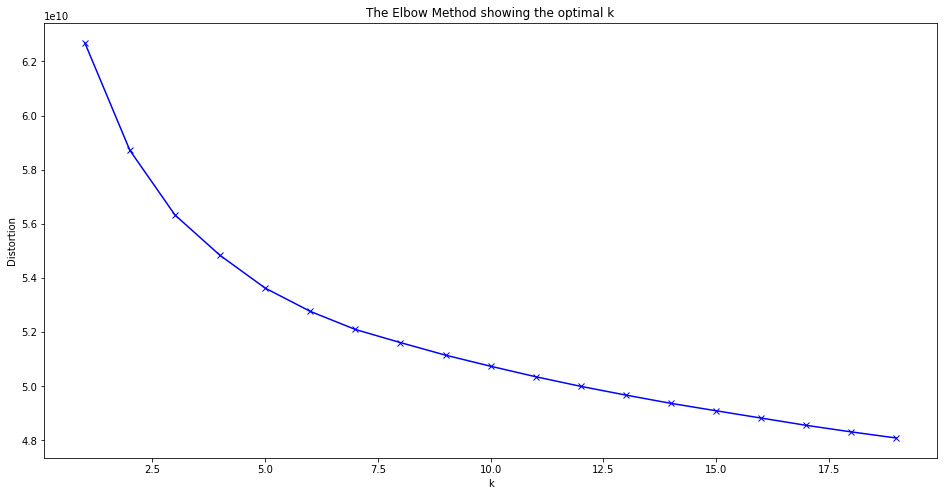

In [30]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_F)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [31]:
kmeans_f = KMeans(n_clusters=15)  # no. of cluster = 15
kmeans_f.fit(data_F)

KMeans(n_clusters=15)

In [32]:
hist=np.histogram(kmeans_f.labels_,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([49261, 42190, 46323, 28201, 44201, 62598, 55126, 39602, 63400,
       60814, 41409, 53499, 20659, 23969, 55836], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])) 



In [35]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=0; as its the first class
i=0
data=[]
c=0

for filename in os.listdir(folder_neg):
    #path
    path=os.path.join(folder_neg,filename)
    a=cv2.imread(path)

    #resize image
    resize=(150, 150)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
    # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    brisk = cv2.BRISK_create()
    keypoints,d = brisk.detectAndCompute(gray,None)
        
    #initialise descriptor
    freak = cv2.SIFT_create()
    k,descriptors= freak.compute(gray,keypoints)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans_f.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoints))
    print("keypoint length ",c," : ",len(keypoints))
    c=c+1
    if c==2000:
        break
    
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv(r"D:\College\SEM 5\CV\Negative_Prediction_F.csv", mode='a',header=False,index=False)

keypoint length  0  :  170
keypoint length  1  :  572
keypoint length  2  :  377
keypoint length  3  :  358
keypoint length  4  :  331
keypoint length  5  :  252
keypoint length  6  :  631
keypoint length  7  :  725
keypoint length  8  :  341
keypoint length  9  :  420
keypoint length  10  :  166
keypoint length  11  :  283
keypoint length  12  :  240
keypoint length  13  :  161
keypoint length  14  :  249
keypoint length  15  :  296
keypoint length  16  :  377
keypoint length  17  :  102
keypoint length  18  :  294
keypoint length  19  :  136
keypoint length  20  :  219
keypoint length  21  :  437
keypoint length  22  :  340
keypoint length  23  :  241
keypoint length  24  :  36
keypoint length  25  :  606
keypoint length  26  :  149
keypoint length  27  :  530
keypoint length  28  :  33
keypoint length  29  :  382
keypoint length  30  :  77
keypoint length  31  :  429
keypoint length  32  :  219
keypoint length  33  :  381
keypoint length  34  :  300
keypoint length  35  :  417
keypo

keypoint length  289  :  187
keypoint length  290  :  348
keypoint length  291  :  248
keypoint length  292  :  326
keypoint length  293  :  133
keypoint length  294  :  87
keypoint length  295  :  246
keypoint length  296  :  196
keypoint length  297  :  343
keypoint length  298  :  395
keypoint length  299  :  240
keypoint length  300  :  389
keypoint length  301  :  481
keypoint length  302  :  371
keypoint length  303  :  373
keypoint length  304  :  295
keypoint length  305  :  189
keypoint length  306  :  427
keypoint length  307  :  430
keypoint length  308  :  467
keypoint length  309  :  369
keypoint length  310  :  147
keypoint length  311  :  265
keypoint length  312  :  190
keypoint length  313  :  90
keypoint length  314  :  384
keypoint length  315  :  127
keypoint length  316  :  348
keypoint length  317  :  188
keypoint length  318  :  263
keypoint length  319  :  345
keypoint length  320  :  98
keypoint length  321  :  323
keypoint length  322  :  314
keypoint length  

keypoint length  573  :  470
keypoint length  574  :  337
keypoint length  575  :  189
keypoint length  576  :  453
keypoint length  577  :  88
keypoint length  578  :  160
keypoint length  579  :  459
keypoint length  580  :  261
keypoint length  581  :  300
keypoint length  582  :  615
keypoint length  583  :  238
keypoint length  584  :  324
keypoint length  585  :  800
keypoint length  586  :  59
keypoint length  587  :  187
keypoint length  588  :  165
keypoint length  589  :  337
keypoint length  590  :  235
keypoint length  591  :  130
keypoint length  592  :  325
keypoint length  593  :  235
keypoint length  594  :  347
keypoint length  595  :  232
keypoint length  596  :  281
keypoint length  597  :  230
keypoint length  598  :  80
keypoint length  599  :  100
keypoint length  600  :  152
keypoint length  601  :  196
keypoint length  602  :  252
keypoint length  603  :  287
keypoint length  604  :  93
keypoint length  605  :  244
keypoint length  606  :  276
keypoint length  6

In [36]:
#performing kmeans prediction of the entire  dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=1
data=[]
k=0
for filename in os.listdir(folder_pos):
    path=os.path.join(folder_pos,filename)
    a=cv2.imread(path)
    resize=(150, 150)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
    # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    brisk = cv2.BRISK_create()
    keypoints,d = brisk.detectAndCompute(gray,None)
        
    #initialise descriptor
    freak = cv2.FREAK_create()
    keypoints,descriptors= freak.compute(gray,keypoints)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans_f.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoints))
    print("keypoint length ",k," : ",len(keypoints))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv("D:\College\SEM 5\CV\pos_prediction_F.csv", mode='a',header=False,index=False)

keypoint length  0  :  354
keypoint length  1  :  379
keypoint length  2  :  349
keypoint length  3  :  470
keypoint length  4  :  446
keypoint length  5  :  376
keypoint length  6  :  304
keypoint length  7  :  229
keypoint length  8  :  155
keypoint length  9  :  355
keypoint length  10  :  244
keypoint length  11  :  401
keypoint length  12  :  295
keypoint length  13  :  121
keypoint length  14  :  161
keypoint length  15  :  171
keypoint length  16  :  186
keypoint length  17  :  218
keypoint length  18  :  215
keypoint length  19  :  244
keypoint length  20  :  127
keypoint length  21  :  82
keypoint length  22  :  408
keypoint length  23  :  122
keypoint length  24  :  83
keypoint length  25  :  155
keypoint length  26  :  56
keypoint length  27  :  137
keypoint length  28  :  121
keypoint length  29  :  196
keypoint length  30  :  179
keypoint length  31  :  160
keypoint length  32  :  226
keypoint length  33  :  93
keypoint length  34  :  54
keypoint length  35  :  85
keypoint

keypoint length  289  :  196
keypoint length  290  :  176
keypoint length  291  :  174
keypoint length  292  :  167
keypoint length  293  :  194
keypoint length  294  :  150
keypoint length  295  :  164
keypoint length  296  :  149
keypoint length  297  :  157
keypoint length  298  :  190
keypoint length  299  :  176
keypoint length  300  :  189
keypoint length  301  :  127
keypoint length  302  :  135
keypoint length  303  :  151
keypoint length  304  :  155
keypoint length  305  :  161
keypoint length  306  :  324
keypoint length  307  :  326
keypoint length  308  :  214
keypoint length  309  :  189
keypoint length  310  :  187
keypoint length  311  :  213
keypoint length  312  :  207
keypoint length  313  :  218
keypoint length  314  :  241
keypoint length  315  :  181
keypoint length  316  :  190
keypoint length  317  :  138
keypoint length  318  :  127
keypoint length  319  :  120
keypoint length  320  :  119
keypoint length  321  :  133
keypoint length  322  :  190
keypoint lengt

In [37]:
#Displaying the kmeans predicted data
print("Negative Images")
dat1_f = pd.read_csv(r"D:\College\SEM 5\CV\Negative_Prediction_F.csv",header=None)
print(dat1_f)

Negative Images
           0         1         2         3         4         5         6   \
0    0.029412  0.000000  0.011765  0.123529  0.000000  0.000000  0.000000   
1    0.166084  0.043706  0.131119  0.005245  0.071678  0.129371  0.043706   
2    0.007958  0.000000  0.000000  0.164456  0.000000  0.013263  0.013263   
3    0.159218  0.005587  0.142458  0.000000  0.022346  0.142458  0.025140   
4    0.045317  0.081571  0.087613  0.012085  0.108761  0.084592  0.223565   
..        ...       ...       ...       ...       ...       ...       ...   
819  0.012285  0.238329  0.088452  0.000000  0.267813  0.090909  0.031941   
820  0.148410  0.000000  0.067138  0.176678  0.000000  0.042403  0.007067   
821  0.112676  0.009390  0.183099  0.000000  0.032864  0.164319  0.075117   
822  0.026515  0.215909  0.083333  0.000000  0.348485  0.075758  0.215909   
823  0.025316  0.282700  0.122363  0.000000  0.270042  0.101266  0.029536   

           7         8         9         10        11      

In [38]:
print("Positive Imges")
dat2_f = pd.read_csv(r"D:\College\SEM 5\CV\pos_prediction_F.csv",header=None)
print(dat2_f)

Positive Imges
           0         1         2         3         4         5         6   \
0    0.135593  0.005650  0.081921  0.098870  0.000000  0.135593  0.031073   
1    0.055409  0.065963  0.063325  0.021108  0.087071  0.118734  0.171504   
2    0.014327  0.000000  0.000000  0.097421  0.000000  0.008596  0.000000   
3    0.040426  0.000000  0.034043  0.000000  0.006383  0.100000  0.061702   
4    0.071749  0.168161  0.082960  0.002242  0.304933  0.107623  0.118834   
..        ...       ...       ...       ...       ...       ...       ...   
392  0.185304  0.015974  0.127796  0.089457  0.054313  0.099042  0.051118   
393  0.008475  0.000000  0.048023  0.059322  0.000000  0.118644  0.064972   
394  0.012658  0.000000  0.000000  0.047468  0.000000  0.009494  0.000000   
395  0.055409  0.065963  0.063325  0.021108  0.087071  0.118734  0.171504   
396  0.071749  0.168161  0.082960  0.002242  0.304933  0.107623  0.118834   

           7         8         9         10        11       

In [39]:
B=dat1_f.append(dat2_f)
csv_data_f=B.to_csv("D:\College\SEM 5\CV\FinalFREAK.csv", mode='a',header=False,index=False)



# COMBINE BRISK + FREAK

In [9]:
pd1=pd.read_csv("D:\College\SEM 5\CV\FinalBRISK.csv",header=None)
pd2=pd.read_csv("D:\College\SEM 5\CV\FinalFREAK.csv",header=None)
df1=pd.DataFrame(pd1)
df1 = df1.iloc[: , :-1]
df2=pd.DataFrame(pd2)

In [41]:
fpd=pd.concat([df1, df2], axis=1)
csv_data=fpd.to_csv("D:\College\SEM 5\CV\FinalPretrainedBriskFreak.csv", mode='w',header=False,index=False)

In [42]:
final_data = pd.read_csv("D:\College\SEM 5\CV\FinalPretrainedBriskFreak.csv",header=None)

In [43]:
final_data_k=pd.DataFrame(final_data)
final_data_k = final_data_k.iloc[: , :-1]

In [44]:
f_data= pd.read_csv("D:\College\SEM 5\CV\FinalPretrainedBriskFreak.csv",header=None)


In [78]:
f_data


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.058824,0.023529,0.023529,0.294118,0.082353,0.035294,0.023529,0.058824,0.011765,0.047059,...,0.000000,0.200000,0.005882,0.005882,0.300000,0.005882,0.311765,0.000000,0.005882,0.0
1,0.039841,0.043825,0.063745,0.035857,0.087649,0.063745,0.063745,0.067729,0.087649,0.059761,...,0.043706,0.010490,0.080420,0.113636,0.000000,0.110140,0.000000,0.000000,0.094406,0.0
2,0.061856,0.020619,0.118557,0.030928,0.025773,0.030928,0.134021,0.041237,0.072165,0.113402,...,0.013263,0.135279,0.026525,0.031830,0.273210,0.087533,0.145889,0.095491,0.005305,0.0
3,0.054608,0.058020,0.071672,0.020478,0.058020,0.088737,0.075085,0.068259,0.078498,0.044369,...,0.025140,0.008380,0.131285,0.164804,0.000000,0.092179,0.002793,0.000000,0.103352,0.0
4,0.037037,0.047619,0.089947,0.015873,0.079365,0.058201,0.063492,0.052910,0.058201,0.068783,...,0.223565,0.021148,0.138973,0.126888,0.000000,0.027190,0.000000,0.003021,0.039275,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,0.075630,0.096639,0.037815,0.029412,0.054622,0.046218,0.117647,0.042017,0.088235,0.029412,...,0.051118,0.063898,0.076677,0.118211,0.012780,0.028754,0.003195,0.019169,0.054313,1.0
1217,0.044000,0.108000,0.060000,0.028000,0.048000,0.096000,0.096000,0.056000,0.068000,0.056000,...,0.064972,0.101695,0.141243,0.177966,0.000000,0.112994,0.011299,0.042373,0.112994,1.0
1218,0.084507,0.042254,0.028169,0.239437,0.056338,0.070423,0.000000,0.056338,0.014085,0.056338,...,0.000000,0.044304,0.012658,0.028481,0.363924,0.041139,0.316456,0.101266,0.022152,1.0
1219,0.044199,0.055249,0.044199,0.049724,0.044199,0.082873,0.110497,0.088398,0.071823,0.044199,...,0.171504,0.094987,0.044855,0.110818,0.005277,0.068602,0.000000,0.026385,0.065963,1.0


In [45]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
f_data = clean_dataset(f_data)

In [79]:
f_data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.058824,0.023529,0.023529,0.294118,0.082353,0.035294,0.023529,0.058824,0.011765,0.047059,...,0.000000,0.200000,0.005882,0.005882,0.300000,0.005882,0.311765,0.000000,0.005882,0.0
1,0.039841,0.043825,0.063745,0.035857,0.087649,0.063745,0.063745,0.067729,0.087649,0.059761,...,0.043706,0.010490,0.080420,0.113636,0.000000,0.110140,0.000000,0.000000,0.094406,0.0
2,0.061856,0.020619,0.118557,0.030928,0.025773,0.030928,0.134021,0.041237,0.072165,0.113402,...,0.013263,0.135279,0.026525,0.031830,0.273210,0.087533,0.145889,0.095491,0.005305,0.0
3,0.054608,0.058020,0.071672,0.020478,0.058020,0.088737,0.075085,0.068259,0.078498,0.044369,...,0.025140,0.008380,0.131285,0.164804,0.000000,0.092179,0.002793,0.000000,0.103352,0.0
4,0.037037,0.047619,0.089947,0.015873,0.079365,0.058201,0.063492,0.052910,0.058201,0.068783,...,0.223565,0.021148,0.138973,0.126888,0.000000,0.027190,0.000000,0.003021,0.039275,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,0.075630,0.096639,0.037815,0.029412,0.054622,0.046218,0.117647,0.042017,0.088235,0.029412,...,0.051118,0.063898,0.076677,0.118211,0.012780,0.028754,0.003195,0.019169,0.054313,1.0
1217,0.044000,0.108000,0.060000,0.028000,0.048000,0.096000,0.096000,0.056000,0.068000,0.056000,...,0.064972,0.101695,0.141243,0.177966,0.000000,0.112994,0.011299,0.042373,0.112994,1.0
1218,0.084507,0.042254,0.028169,0.239437,0.056338,0.070423,0.000000,0.056338,0.014085,0.056338,...,0.000000,0.044304,0.012658,0.028481,0.363924,0.041139,0.316456,0.101266,0.022152,1.0
1219,0.044199,0.055249,0.044199,0.049724,0.044199,0.082873,0.110497,0.088398,0.071823,0.044199,...,0.171504,0.094987,0.044855,0.110818,0.005277,0.068602,0.000000,0.026385,0.065963,1.0


In [46]:
x = f_data.iloc[:,0:31].values
x

array([[0.05882353, 0.02352941, 0.02352941, ..., 0.31176471, 0.        ,
        0.00588235],
       [0.03984064, 0.0438247 , 0.06374502, ..., 0.        , 0.        ,
        0.09440559],
       [0.06185567, 0.02061856, 0.1185567 , ..., 0.14588859, 0.09549072,
        0.00530504],
       ...,
       [0.08450704, 0.04225352, 0.02816901, ..., 0.3164557 , 0.10126582,
        0.0221519 ],
       [0.0441989 , 0.05524862, 0.0441989 , ..., 0.        , 0.02638522,
        0.06596306],
       [0.04522613, 0.05527638, 0.05025126, ..., 0.0044843 , 0.01121076,
        0.03587444]])

In [47]:
y = f_data.iloc[:,31].values
y

array([0., 0., 0., ..., 1., 1., 1.])

In [48]:
from sklearn.preprocessing import StandardScaler
DhoniS = StandardScaler()
Dhoni = DhoniS.fit_transform(x)

In [49]:
Dhoni

array([[ 0.05272477, -1.82428182, -1.45149126, ...,  3.93333673,
        -0.68748978, -1.21514602],
       [-0.77589397, -1.00331401,  0.05419858, ..., -0.54264213,
        -0.68748978,  0.2054986 ],
       [ 0.18508018, -1.94202925,  2.10637173, ...,  1.55186777,
         0.68195282, -1.2244109 ],
       ...,
       [ 1.17383108, -1.06687006, -1.27778253, ...,  4.00068487,
         0.76477424, -0.954048  ],
       [-0.58565247, -0.54120341, -0.67761682, ..., -0.54264213,
        -0.30909645, -0.25095478],
       [-0.5408128 , -0.54008036, -0.45101379, ..., -0.47826136,
        -0.52671504, -0.73382501]])

In [4]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=None)
pca.fit(Dhoni)

PCA()

In [52]:
Bhumi = pca.transform(Dhoni)
Bhumi

array([[ 6.62428976e+00,  1.28055912e+00, -1.05022418e+00, ...,
        -4.92902976e-01, -9.40788154e-16,  1.11022302e-15],
       [-2.40031519e+00,  1.61713081e+00, -9.75704618e-01, ...,
        -4.31260734e-03,  8.61821959e-16, -5.68989300e-16],
       [ 4.34515905e+00, -2.62046992e+00,  2.00208381e+00, ...,
         2.51393975e-01, -1.06931780e-15, -4.99600361e-16],
       ...,
       [ 5.56502482e+00,  8.22341783e-01, -1.53039526e+00, ...,
        -8.75370827e-01, -6.41150111e-16,  6.93889390e-16],
       [-1.31729151e+00,  2.31463052e-01,  1.79984644e-01, ...,
        -1.33189646e-01,  1.31342584e-15,  6.10622664e-16],
       [-1.14109622e+00,  2.52764290e+00,  1.48648767e+00, ...,
        -2.59597341e-01,  6.12641785e-17, -5.55111512e-16]])

In [53]:
Bhumi.shape

(1221, 31)

In [54]:
Bhumi = pd.DataFrame(Bhumi)

In [55]:
print(pca.explained_variance_ratio_.sum())

1.0


In [56]:
pca = PCA(n_components=28)
pca.fit(Dhoni)

PCA(n_components=28)

In [57]:
import pickle

In [58]:
filename = "D:\College\SEM 5\CV\PCA_Model.sav"
pickle.dump(pca, open(filename, 'wb'))

In [59]:
Bhumi = pca.transform(Dhoni)
Bhumi

array([[ 6.62428976,  1.28055912, -1.05022418, ...,  0.08532691,
         0.17024159, -0.19385216],
       [-2.40031519,  1.61713081, -0.97570462, ...,  0.4221625 ,
         0.45262381,  0.01447542],
       [ 4.34515905, -2.62046992,  2.00208381, ...,  0.52462934,
         0.13967907, -0.37008432],
       ...,
       [ 5.56502482,  0.82234178, -1.53039526, ...,  0.55039608,
         0.1419475 ,  0.18668693],
       [-1.31729151,  0.23146305,  0.17998464, ...,  0.62446779,
         0.17001274,  0.24324056],
       [-1.14109622,  2.5276429 ,  1.48648767, ...,  0.11719229,
         0.19616484, -0.49025748]])

In [60]:
print(pca.explained_variance_ratio_.sum()) 

0.9940309702219812


In [61]:
Bhumi = pd.DataFrame(Bhumi)
Bhumi

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,6.624290,1.280559,-1.050224,1.165529,0.347758,1.362623,-1.359217,3.088193,-0.533513,0.679515,...,-0.705566,-1.034712,0.036680,0.579882,0.803390,0.304206,0.797092,0.085327,0.170242,-0.193852
1,-2.400315,1.617131,-0.975705,-1.138354,0.196662,1.254827,-1.522024,-0.328346,-0.748982,-0.002998,...,1.153341,-0.630328,-0.506069,-0.367613,0.184055,-0.204423,-0.199921,0.422163,0.452624,0.014475
2,4.345159,-2.620470,2.002084,-1.584778,1.138755,0.167612,0.060709,-2.884558,-0.453882,-0.389695,...,-1.295025,0.021746,-0.528571,-0.035534,0.610812,0.091280,0.512592,0.524629,0.139679,-0.370084
3,-2.723330,0.605590,-1.476191,-1.450343,0.209148,0.086851,0.023078,0.046336,-0.629219,-0.101389,...,0.080263,-0.925405,-0.512302,-0.525985,0.097094,-0.304929,-0.198121,0.134090,0.615413,0.146335
4,-1.837067,0.701992,0.983260,-0.799371,0.149248,1.274767,-1.143646,-0.557500,1.719545,-0.109379,...,-0.916757,0.465891,-0.443688,0.512191,0.841887,-0.200054,0.002736,0.021063,0.322555,0.139527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,-1.047215,0.648964,-0.701007,-2.525399,1.224789,-1.421794,0.332643,-0.511246,-0.577091,0.075091,...,0.145467,-0.416469,-1.642170,-0.222766,-0.005406,-0.803388,0.225150,0.120526,0.340475,0.057450
1217,-1.568243,-1.545233,-1.145237,-0.978197,-1.005497,-0.296397,1.184888,-0.575344,0.190377,-0.067364,...,-0.689852,0.234716,0.076005,0.616170,-0.351236,0.198837,0.459960,0.109281,0.474471,0.276939
1218,5.565025,0.822342,-1.530395,2.545977,0.307604,1.112664,0.905296,2.430851,0.709945,1.756921,...,0.762940,-1.314041,-0.337417,0.589815,0.673159,0.493714,-0.016618,0.550396,0.141948,0.186687
1219,-1.317292,0.231463,0.179985,-0.293391,-0.248850,-1.579774,-0.695063,-0.871462,0.062883,1.016018,...,-1.036068,0.366335,0.274184,0.396400,-0.506856,0.104852,-0.207773,0.624468,0.170013,0.243241


In [62]:
B=pd.concat([Bhumi, pd.DataFrame(y)],axis=1)

In [63]:
csv_data=B.to_csv("D:\College\SEM 5\CV\FinalPCAFV.csv", mode='a',header=False,index=False)

# Training Testing and Classification


In [10]:
train_data = pd.read_csv("D:\College\SEM 5\CV\FinalPCAFV.csv",header=None)

In [11]:
#assigning x the columns from 1 to 27 for training
x = train_data.iloc[:,0:28].values
print("X values")
print(x)

#assigning y with the column "Class" as target variable
y = train_data.iloc[:,28]
print("Y values")
print(y)

X values
[[ 6.62428976  1.28055912 -1.05022418 ...  0.08532691  0.17024159
  -0.19385216]
 [-2.40031519  1.61713081 -0.97570462 ...  0.4221625   0.45262381
   0.01447542]
 [ 4.34515905 -2.62046992  2.00208381 ...  0.52462934  0.13967907
  -0.37008432]
 ...
 [ 5.56502482  0.82234178 -1.53039526 ...  0.55039608  0.1419475
   0.18668693]
 [-1.31729151  0.23146305  0.17998464 ...  0.62446779  0.17001274
   0.24324056]
 [-1.14109622  2.5276429   1.48648767 ...  0.11719229  0.19616484
  -0.49025748]]
Y values
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1216    1.0
1217    1.0
1218    1.0
1219    1.0
1220    1.0
Name: 28, Length: 1221, dtype: float64


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

In [13]:
import joblib

In [16]:
x_train

array([[-0.75790682,  0.49385161,  1.71641755, ...,  0.5672771 ,
        -0.6528963 , -0.43822617],
       [-2.39591743, -2.63616878, -0.03514773, ...,  0.76317006,
        -0.05708082, -0.79402225],
       [ 5.50865192, -1.29583169,  0.73065181, ..., -0.2660401 ,
         0.17856325,  0.2237781 ],
       ...,
       [-1.04721534,  0.64896358, -0.70100687, ...,  0.12052593,
         0.3404752 ,  0.05744983],
       [-0.45896697,  3.40345736, -0.22135047, ..., -0.44345752,
        -0.47826356,  0.36127157],
       [-2.601248  ,  2.39412648, -2.94054259, ..., -0.12250215,
         0.04353532, -0.68874796]])

In [17]:
y_train

546     0.0
902     1.0
1037    1.0
422     0.0
85      0.0
       ... 
763     0.0
835     1.0
1216    1.0
559     0.0
684     0.0
Name: 28, Length: 976, dtype: float64

In [55]:
!pip install yellowbrick

  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import utils

In [20]:
print(utils.multiclass.type_of_target(y_train))

binary


In [15]:
from sklearn.metrics import accuracy_score
#Assign model with Decision Tree classifier
model_dt = DecisionTreeClassifier(max_depth=13)
joblib.dump(model_dt,"model_dt")
#training the model with the Training Variables 
model_dt.fit(x_train, y_train)
#joblib.dump(model_dt,"model_dt")
#predicting the traget variable using testing variables
y_pred1 = model_dt.predict(x_test)
#Results
print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")
print("Train Accuracy:",model_dt.score(x_train, y_train))
print("Test Accuracy:",model_dt.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred1, pos_label='positive', average='micro')) # true positive rate, Sensitivity
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred1, pos_label='positive', average='micro', beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))

Decision Tree Results
Decision Tree Accuracy:  66.93877551020408 %
Train Accuracy: 1.0
Test Accuracy: 0.6693877551020408
Precision Score:  0.6693877551020408
Recall Score:  0.6693877551020408
F2 Score:  0.6693877551020408
F1 Score:  0.6693877551020408
Confusion Matrix: 
[[111  42]
 [ 39  53]]


C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro

# RANDOM FOREST

In [70]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 50)

model_rf.fit(x_train, y_train)
joblib.dump(model_rf,"model_rf")

y_pred2 = model_rf.predict(x_test)
print("Random Forest Clasifier")
print("Train Accuracy:",model_rf.score(x_train, y_train))
print("Test Accuracy:",model_rf.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2,))

Random Forest Clasifier
Train Accuracy: 1.0
Test Accuracy: 0.7836734693877551
Precision Score:  0.7836734693877551
Recall Score:  0.7836734693877551
F1 Score:  0.783673469387755
Confusion Matrix: 
[[144   9]
 [ 44  48]]


C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(x_train, y_train)
#joblib.dump(model_knn,"model_knn")
y_pred3 = model_knn.predict(x_test)
print("KNN")
print("Train Accuracy:",model_knn.score(x_train, y_train))
print("Test Accuracy:",model_knn.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3, pos_label='positive', average='micro'))


KNN
Train Accuracy: 0.8555327868852459
Test Accuracy: 0.8
Precision Score:  0.8
Recall Score:  0.8
F1 Score:  0.8000000000000002


C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# SVM LINEAR

In [72]:
from sklearn import svm
model_svm_l = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo')
model_svm_l.fit(x_train, y_train)
#joblib.dump(model_svm_l,"model_svm_l")
y_pred4 = model_svm_l.predict(x_test)
print("SVM Linear kernel")
print("Train Accuracy:",model_svm_l.score(x_train, y_train))
print("Test Accuracy:",model_svm_l.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred4, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred4, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred4, pos_label='positive', average='micro'))



SVM Linear kernel
Train Accuracy: 0.8596311475409836
Test Accuracy: 0.7959183673469388
Precision Score:  0.7959183673469388
Recall Score:  0.7959183673469388
F1 Score:  0.7959183673469388


C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# SVM SIGMOID

In [73]:
from sklearn import svm
model_svm_s = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo')
model_svm_s.fit(x_train, y_train)
joblib.dump(model_svm_s,"model_svm_s")
y_pred5 = model_svm_s.predict(x_test)
print("SVM Sigmoid kernel")
print("Train Accuracy:",model_svm_s.score(x_train, y_train))
print("Test Accuracy:",model_svm_s.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred5, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred5, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred5, pos_label='positive', average='micro'))


SVM Sigmoid kernel
Train Accuracy: 0.7817622950819673
Test Accuracy: 0.7387755102040816
Precision Score:  0.7387755102040816
Recall Score:  0.7387755102040816
F1 Score:  0.7387755102040816


C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# SVM POLY

In [74]:
from sklearn import svm
model_svm_p = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo')
model_svm_p.fit(x_train, y_train)
joblib.dump(model_svm_p,"model_svm_p")
y_pred6 = model_svm_p.predict(x_test)
print("SVM Poly kernel")
print("Train Accuracy:",model_svm_p.score(x_train, y_train))
print("Test Accuracy:",model_svm_p.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred6, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred6, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred6, pos_label='positive', average='micro'))

SVM Poly kernel
Train Accuracy: 0.8965163934426229
Test Accuracy: 0.7918367346938775
Precision Score:  0.7918367346938775
Recall Score:  0.7918367346938775
F1 Score:  0.7918367346938775


C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# SVM RBF 

In [21]:
from sklearn import svm
model_svm_r = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')
model_svm_r.fit(x_train, y_train)
joblib.dump(model_svm_r,"model_svm_r")
y_pred7 = model_svm_r.predict(x_test)
print("SVM RBF kernel")
print("Train Accuracy:",model_svm_r.score(x_train, y_train))
print("Test Accuracy:",model_svm_r.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred7, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred7, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred7, pos_label='positive', average='micro'))

SVM RBF kernel
Train Accuracy: 1.0
Test Accuracy: 0.6448979591836734
Precision Score:  0.6448979591836734
Recall Score:  0.6448979591836734
F1 Score:  0.6448979591836734


C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# GAUSSION NAVIE BAYES 

In [76]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB().fit(x_train, y_train)
joblib.dump(model_nb,"model_nb")
y_pred8 = model_nb.predict(x_test)
print("Gaussian NB")
print("Train Accuracy:",model_nb.score(x_train, y_train))
print("Test Accuracy:",model_nb.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred8, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred8, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred8, pos_label='positive', average='micro'))

Gaussian NB
Train Accuracy: 0.8237704918032787
Test Accuracy: 0.7387755102040816
Precision Score:  0.7387755102040816
Recall Score:  0.7387755102040816
F1 Score:  0.7387755102040816


C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# VOTING CLASSIFIER

In [77]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier( estimators=[('DT', model_dt ), ('RF', model_rf),('KNN', model_knn), ('SCVP', model_svm_p), 
                                           ('GuassianNB', model_nb)], voting='hard')
model_voting.fit(x_train, y_train)
voting_pred = model_voting.predict(x_test)
joblib.dump(model_voting,"model_voting")
CM = confusion_matrix(y_test, voting_pred)
print("Voting Classifier Hard")
print("Train Accuracy:",model_voting.score(x_train, y_train))
print("Test Accuracy:",model_voting.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, voting_pred,pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, voting_pred,pos_label='positive', average='micro'))
print("F2 Score: ",metrics.fbeta_score(y_test, voting_pred,pos_label='positive', average='micro',beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, voting_pred,pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, voting_pred))

Voting Classifier Hard
Train Accuracy: 0.9487704918032787
Test Accuracy: 0.8
Precision Score:  0.8
Recall Score:  0.8
F2 Score:  0.8
F1 Score:  0.8000000000000002
Confusion Matrix: 
[[147   6]
 [ 43  49]]


C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro